<a href="https://colab.research.google.com/github/rkuo2000/AI-stocks/blob/main/ch04_stock_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH-04 讓 AI 計算技術指標及資料視覺化

## 4-1 技術指標公式太複雜？讓 AI 自動化計算

### 1️⃣ 安裝及匯入套件

In [1]:
!pip install openai
!pip install yfinance -U

In [2]:
from  openai import OpenAI, OpenAIError # 串接 OpenAI API
import yfinance as yf
import pandas as pd # 資料處理套件
import numpy as np
import datetime as dt # 時間套件

### 2️⃣ 取得股票資料

In [3]:
# 輸入股票代號
stock_id = "2330.tw"
# 抓取半年資料
end = dt.date.today() # 資料結束時間
start = end - dt.timedelta(days=180) # 資料開始時間
#df = yf.download(stock_id, start=start, end=end).reset_index()
df = yf.Ticker(stock_id).history(start=start, end=end)
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0
2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0
2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0
2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0
2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0


### 3️⃣ 輸入 OpenAI API KEY

In [4]:
from google.colab import userdata

client = OpenAI(
  base_url="https://api.groq.com/openai/v1",
  api_key=userdata.get('GROQ_API_KEY')
)

### 4️⃣ 創建 GPT-OSS-20B 模型函式

In [5]:
model_name = "openai/gpt-oss-20b"

def get_reply(messages):
  try:
    response = client.chat.completions.create(model=model_name,
                         messages=messages)
    reply = response.choices[0].message.content
  except OpenAIError as err:
    reply = f"發生 {err.type} 錯誤\n{err.message}"
  return reply

# 設定 AI 角色, 使其依據使用者需求進行 df 處理
def ai_helper(df, user_msg):

  msg = [{
    "role":
    "system",
    "content":
    f"As a professional code generation robot, \
      I require your assistance in generating Python code \
      based on specific user requirements. To proceed, \
      I will provide you with a dataframe (df) that follows the \
      format {df.columns}. Your task is to carefully analyze the \
      user's requirements and generate the Python code \
      accordingly.Please note that your response should solely \
      consist of the code itself, \
      and no additional information should be included."
  }, {
    "role":
    "user",
    "content":
    f"The user requirement:{user_msg} \n\
       Your task is to develop a Python function named \
      'calculate(df)'. This function should accept a dataframe as \
      its parameter. Ensure that you only utilize the columns \
      present in the dataset, specifically {df.columns}. \
      After processing, the function should return the processed \
      dataframe. Your response should strictly contain the Python \
      code for the 'calculate(df)' function \
      and exclude any unrelated content."
  }]

  reply_data = get_reply(msg)
  cleaned_code = reply_data.replace("```", "")
  cleaned_code = cleaned_code.replace("python", "")

  return cleaned_code

### 讓 AI 自動生成技術指標程式碼

### 5️⃣ 計算移動平均線

In [6]:
code_str = ai_helper(df, "計算8日MA與13日MA ")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the 8-day and 13-day simple moving averages of the 'Close' price
    and adds them as new columns 'MA8' and 'MA13' to the dataframe.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing at least the columns:
        ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

    Returns
    -------
    pd.DataFrame
        The original DataFrame with two additional columns:
        'MA8' and 'MA13'.
    """
    # Ensure the required columns exist
    required_columns = {'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'}
    if not required_columns.issubset(df.columns):
        missing = required_columns - set(df.columns)
        raise ValueError(f"Missing required columns: {missing}")

    # Compute 8-day and 13-day simple moving averages on the 'Close' column
    df['MA8'] = df['Close'].rolling(window=8, min_periods=1).mean()
    d

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13
Date,,,,,,,,,
2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0,1387.50,1361.153846
2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0,1402.50,1371.153846
2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0,1420.00,1380.769231
2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0,1435.00,1391.923077
2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0,1441.25,1401.923077


### 6️⃣ 計算 MACD

In [7]:
code_str = ai_helper(new_df, "先計算 EMA 再計算 MACD, 欄位名稱用 MACD_Histogram 命名")
print(code_str)
exec(code_str)
new_df = calculate(new_df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the MACD histogram using EMA12, EMA26, and EMA9 of the MACD line.
    The result is stored in a new column named 'MACD_Histogram'.
    """
    # Ensure 'Close' column exists
    if 'Close' not in df.columns:
        raise KeyError("Input DataFrame must contain a 'Close' column.")

    # Compute EMA12 and EMA26 on the closing price
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

    # MACD line
    df['MACD_line'] = df['EMA12'] - df['EMA26']

    # Signal line: EMA9 of the MACD line
    df['MACD_signal'] = df['MACD_line'].ewm(span=9, adjust=False).mean()

    # Histogram
    df['MACD_Histogram'] = df['MACD_line'] - df['MACD_signal']

    # Optional: drop intermediate EMA columns if not needed
    # df.drop(columns=['EMA12', 'EMA26', 'MACD_line', 'MACD_signal'], inplace=True)

    return df



,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13,EMA12,EMA26,MACD_line,MACD_signal,MACD_Histogram
Date,,,,,,,,,,,,,,
2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0,1387.50,1361.153846,1370.679024,1311.738816,58.940207,50.610131,8.330076
2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0,1402.50,1371.153846,1379.036097,1320.128534,58.907563,52.269618,6.637946
2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0,1420.00,1380.769231,1392.261313,1330.859753,61.401559,54.096006,7.305553
2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0,1435.00,1391.923077,1406.528803,1342.277549,64.251254,56.127056,8.124198
2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0,1441.25,1401.923077,1413.216680,1350.256990,62.959689,57.493582,5.466107


### 7️⃣ 計算 RSI

In [8]:
code_str = ai_helper(new_df, "計算 RSI ")
print(code_str)
exec(code_str)
new_df = calculate(new_df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the 14‑period RSI for the 'Close' price and add it to the dataframe
    as a new column named 'RSI'.
    
    Parameters
    ----------
    df : pd.DataFrame
        Dataframe containing at least the 'Close' column (plus the other columns listed).
    
    Returns
    -------
    pd.DataFrame
        The input dataframe with an additional 'RSI' column.
    """
    # Ensure 'Close' column exists
    if 'Close' not in df.columns:
        raise KeyError("Input dataframe must contain a 'Close' column.")
    
    # Number of periods for RSI
    period = 14
    
    # Compute price changes
    delta = df['Close'].diff()
    
    # Separate gains and losses
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    
    # Compute average gain and loss
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()
    

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13,EMA12,EMA26,MACD_line,MACD_signal,MACD_Histogram,RSI
Date,,,,,,,,,,,,,,,
2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0,1387.50,1361.153846,1370.679024,1311.738816,58.940207,50.610131,8.330076,69.117647
2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0,1402.50,1371.153846,1379.036097,1320.128534,58.907563,52.269618,6.637946,74.242424
2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0,1420.00,1380.769231,1392.261313,1330.859753,61.401559,54.096006,7.305553,75.000000
2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0,1435.00,1391.923077,1406.528803,1342.277549,64.251254,56.127056,8.124198,73.015873
2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0,1441.25,1401.923077,1413.216680,1350.256990,62.959689,57.493582,5.466107,65.714286


### 8️⃣ 計算布林通道

In [9]:
code_str = ai_helper(new_df, "請計算1.5個標準差的布林通道, 欄位以 Upper_Band 和 Lower_Band 命名")
print(code_str)
exec(code_str)
new_df = calculate(new_df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate a 1.5 standard‑deviation Bollinger Band using the Close price.
    Adds two columns: 'Upper_Band' and 'Lower_Band'.
    """
    # Ensure we are working on a copy to avoid modifying the original dataframe
    df = df.copy()

    # Define the rolling window for Bollinger Bands (commonly 20 periods)
    window = 20

    # Calculate rolling mean and standard deviation of the Close price
    rolling_mean = df['Close'].rolling(window=window, min_periods=1).mean()
    rolling_std = df['Close'].rolling(window=window, min_periods=1).std(ddof=0)

    # Bollinger Band width: 1.5 standard deviations
    band_width = 1.5 * rolling_std

    # Compute Upper and Lower Bands
    df['Upper_Band'] = rolling_mean + band_width
    df['Lower_Band'] = rolling_mean - band_width

    return df



,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13,EMA12,EMA26,MACD_line,MACD_signal,MACD_Histogram,RSI,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,
2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0,1387.50,1361.153846,1370.679024,1311.738816,58.940207,50.610131,8.330076,69.117647,1421.694054,1231.309925
2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0,1402.50,1371.153846,1379.036097,1320.128534,58.907563,52.269618,6.637946,74.242424,1430.916668,1241.081343
2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0,1420.00,1380.769231,1392.261313,1330.859753,61.401559,54.096006,7.305553,75.000000,1445.973300,1247.026700
2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0,1435.00,1391.923077,1406.528803,1342.277549,64.251254,56.127056,8.124198,73.015873,1461.665047,1254.834953
2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0,1441.25,1401.923077,1413.216680,1350.256990,62.959689,57.493582,5.466107,65.714286,1470.626354,1262.873646


### 9️⃣ 能量潮指標 (On-Balance Volumem, OBV)

In [10]:
code_str = ai_helper(new_df, "計算 OBV 指標")
print(code_str)
exec(code_str)
new_df = calculate(new_df)
new_df.tail()

import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate On‑Balance Volume (OBV) and add it as a new column to the dataframe.
    """
    # Ensure required columns exist
    if not {'Close', 'Volume'}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'Close' and 'Volume' columns.")
    
    # Compute direction of price movement: +1 if close up, -1 if close down, 0 if unchanged
    price_change = df['Close'].diff()
    direction = price_change.apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    # OBV is cumulative sum of volume * direction
    df['OBV'] = (direction * df['Volume']).cumsum()
    
    return df


,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13,EMA12,EMA26,MACD_line,MACD_signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,,
2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0,1387.50,1361.153846,1370.679024,1311.738816,58.940207,50.610131,8.330076,69.117647,1421.694054,1231.309925,918434351
2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0,1402.50,1371.153846,1379.036097,1320.128534,58.907563,52.269618,6.637946,74.242424,1430.916668,1241.081343,958323607
2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0,1420.00,1380.769231,1392.261313,1330.859753,61.401559,54.096006,7.305553,75.000000,1445.973300,1247.026700,999380012
2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0,1435.00,1391.923077,1406.528803,1342.277549,64.251254,56.127056,8.124198,73.015873,1461.665047,1254.834953,1037117690
2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0,1441.25,1401.923077,1413.216680,1350.256990,62.959689,57.493582,5.466107,65.714286,1470.626354,1262.873646,999040359


### 讓 AI 自動統整 Dataframe

### 🔟 將日頻資料轉換成月頻資料

In [11]:
code_str = ai_helper(new_df, "請將日K線的資料轉換成月K線 ")
print(code_str)
exec(code_str)
new_df = new_df
df_monthly = new_df
df_monthly = calculate(df_monthly)
df_monthly.tail()

def calculate(df):
    import pandas as pd
    # Ensure the index is a DatetimeIndex for resampling
    if not isinstance(df.index, pd.DatetimeIndex):
        df = df.set_index(pd.to_datetime(df.index))
    # Aggregate daily data into monthly candlesticks
    monthly_df = df.resample('M').agg(
        {
            'Open': 'first',
            'High': 'max',
            'Low': 'min',
            'Close': 'last',
            'Volume': 'sum',
            'Dividends': 'sum',
            'Stock Splits': 'sum',
            'MA8': 'first',
            'MA13': 'first',
            'EMA12': 'first',
            'EMA26': 'first',
            'MACD_line': 'first',
            'MACD_signal': 'first',
            'MACD_Histogram': 'first',
            'RSI': 'first',
            'Upper_Band': 'first',
            'Lower_Band': 'first',
            'OBV': 'first',
        }
    )
    return monthly_df


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13,EMA12,EMA26,MACD_line,MACD_signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,,
2025-06-30 00:00:00+08:00,950.151444,1075.697173,938.249756,1055.776855,667335366,4.500020,0.0,964.160713,971.131977,957.945070,938.106659,19.838410,27.091670,-7.253260,45.985413,993.915133,921.066490,122007947
2025-07-31 00:00:00+08:00,1075.697167,1160.358497,1060.756905,1155.378418,689722354,0.000000,0.0,1057.644371,1048.498272,1051.475235,1022.876857,28.598378,28.039657,0.558721,54.989811,1079.466075,992.469478,431114315
2025-08-31 00:00:00+08:00,1125.497948,1195.219116,1120.517869,1155.378418,575596483,0.000000,0.0,1141.060715,1138.522780,1133.689169,1109.564452,24.124717,26.876533,-2.751816,62.499981,1159.594316,1082.935481,536430196
2025-09-30 00:00:00+08:00,1145.418282,1355.000000,1140.438180,1305.000000,621107551,5.000018,0.0,1158.490997,1161.507784,1160.594953,1151.037173,9.557780,13.245274,-3.687494,46.666652,1191.731990,1133.965191,669173840
2025-10-31 00:00:00+08:00,1325.000000,1495.000000,1325.000000,1450.000000,405587013,0.000000,0.0,1311.250000,1294.229239,1292.610815,1251.846261,40.764553,37.802969,2.961585,69.800675,1345.020845,1168.652446,857276303


## 4-2 資料視覺化

### 1️⃣1️⃣ 安裝及匯入套件

In [12]:
import matplotlib.pyplot as plt

### 畫出簡易股價圖

### 1️⃣2️⃣ 讓我們再一次檢視資料格式吧！

In [13]:
new_df = new_df.reset_index() # 重設 index
new_df['Date'] = pd.to_datetime(new_df['Date']) # 將 Date 轉換為 datetime 類別
new_df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13,EMA12,EMA26,MACD_line,MACD_signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
119,2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0,1387.50,1361.153846,1370.679024,1311.738816,58.940207,50.610131,8.330076,69.117647,1421.694054,1231.309925,918434351
120,2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0,1402.50,1371.153846,1379.036097,1320.128534,58.907563,52.269618,6.637946,74.242424,1430.916668,1241.081343,958323607
121,2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0,1420.00,1380.769231,1392.261313,1330.859753,61.401559,54.096006,7.305553,75.000000,1445.973300,1247.026700,999380012
122,2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0,1435.00,1391.923077,1406.528803,1342.277549,64.251254,56.127056,8.124198,73.015873,1461.665047,1254.834953,1037117690
123,2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0,1441.25,1401.923077,1413.216680,1350.256990,62.959689,57.493582,5.466107,65.714286,1470.626354,1262.873646,999040359


### 1️⃣3️⃣ 使用 matplotlib 畫出收盤價的折線圖

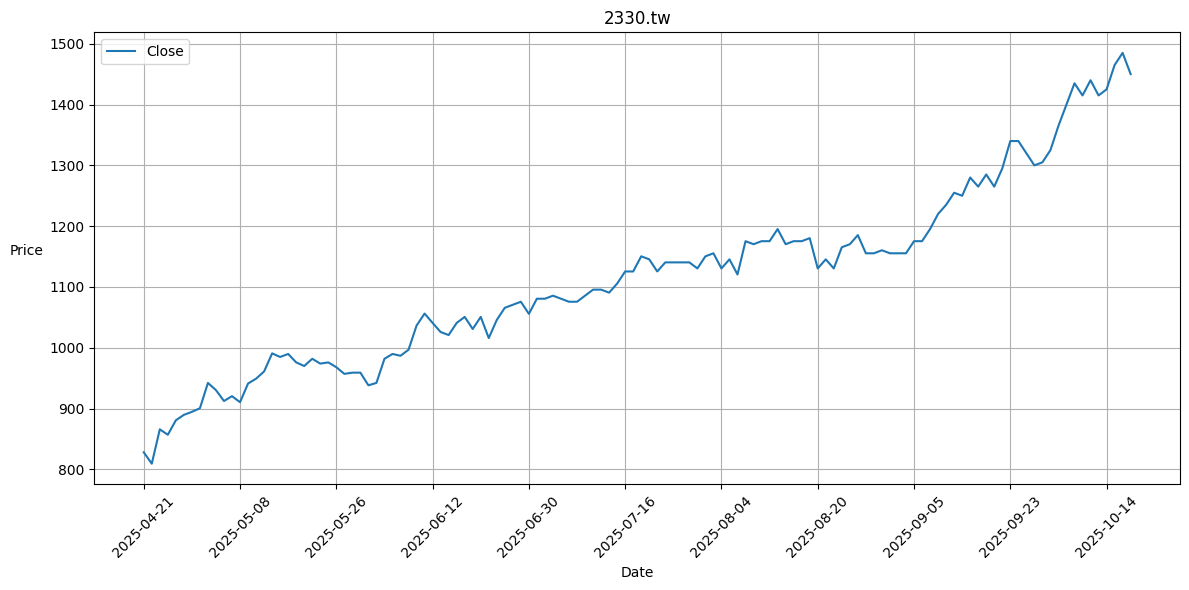

In [14]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 6))

# 設定要繪製的資料欄位
plt.plot(new_df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num], rotation = 45)

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price', rotation=0, ha='right')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()

# 顯示圖表
plt.show()

### 1️⃣4️⃣ 加入成交量

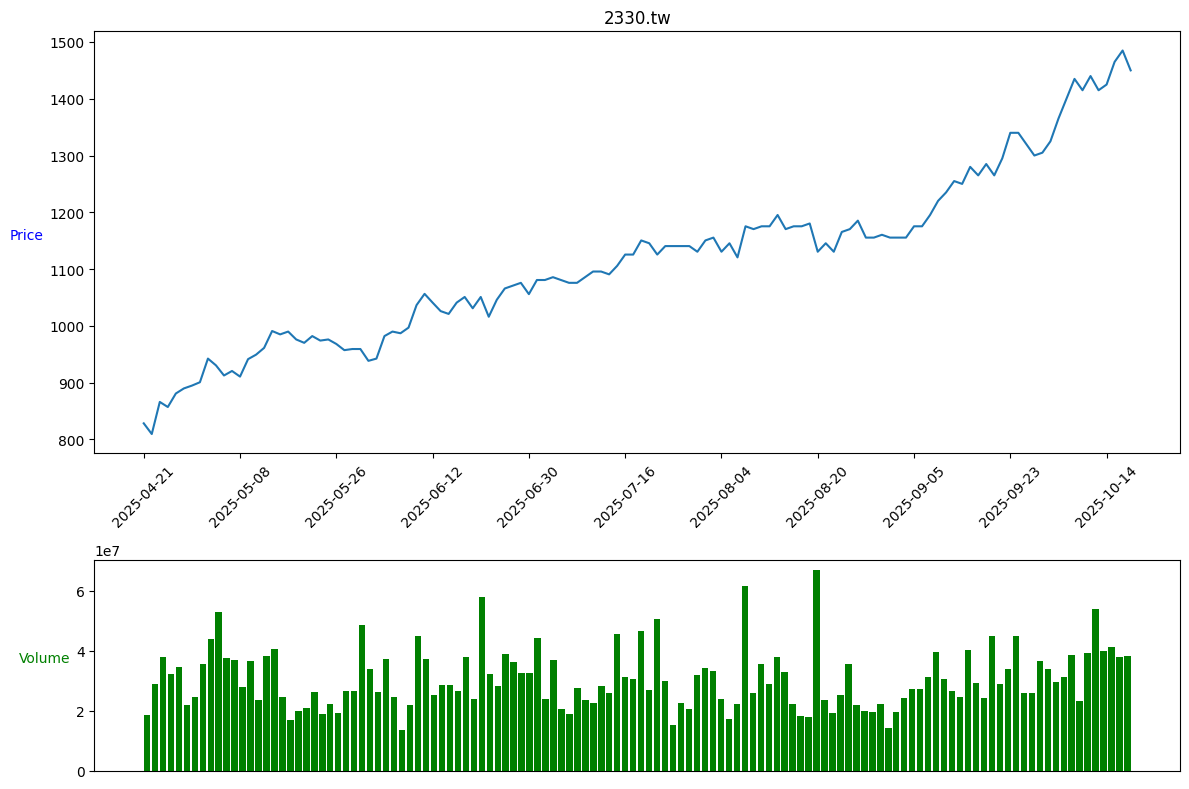

In [15]:
# 創建兩張子圖
fig, (ax1, ax2) = plt.subplots(2, 1,
                figsize=(12, 8),
                gridspec_kw={'height_ratios': [2, 1]})

# 設定 x 軸時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# 繪製收盤價
ax1.plot(new_df['Close'], label='Close')
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num], rotation=45)

# 繪製交易量
ax2.bar(new_df.index, new_df['Volume'],  color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')
ax2.set_xticks([]) # 不顯示日期標籤
# 若要顯示圖表標籤可以使用以下程式碼
# ax2.set_xticks(date[::len(date)//num].index)
# ax2.set_xticklabels(date[::len(date)//num], rotation=45)

# 讓子圖填充、對齊
plt.tight_layout()

# 顯示圖表
plt.show()


### 1️⃣5️⃣ 加入技術指標

In [16]:
new_df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13,EMA12,EMA26,MACD_line,MACD_signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
119,2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0,1387.50,1361.153846,1370.679024,1311.738816,58.940207,50.610131,8.330076,69.117647,1421.694054,1231.309925,918434351
120,2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0,1402.50,1371.153846,1379.036097,1320.128534,58.907563,52.269618,6.637946,74.242424,1430.916668,1241.081343,958323607
121,2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0,1420.00,1380.769231,1392.261313,1330.859753,61.401559,54.096006,7.305553,75.000000,1445.973300,1247.026700,999380012
122,2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0,1435.00,1391.923077,1406.528803,1342.277549,64.251254,56.127056,8.124198,73.015873,1461.665047,1254.834953,1037117690
123,2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0,1441.25,1401.923077,1413.216680,1350.256990,62.959689,57.493582,5.466107,65.714286,1470.626354,1262.873646,999040359


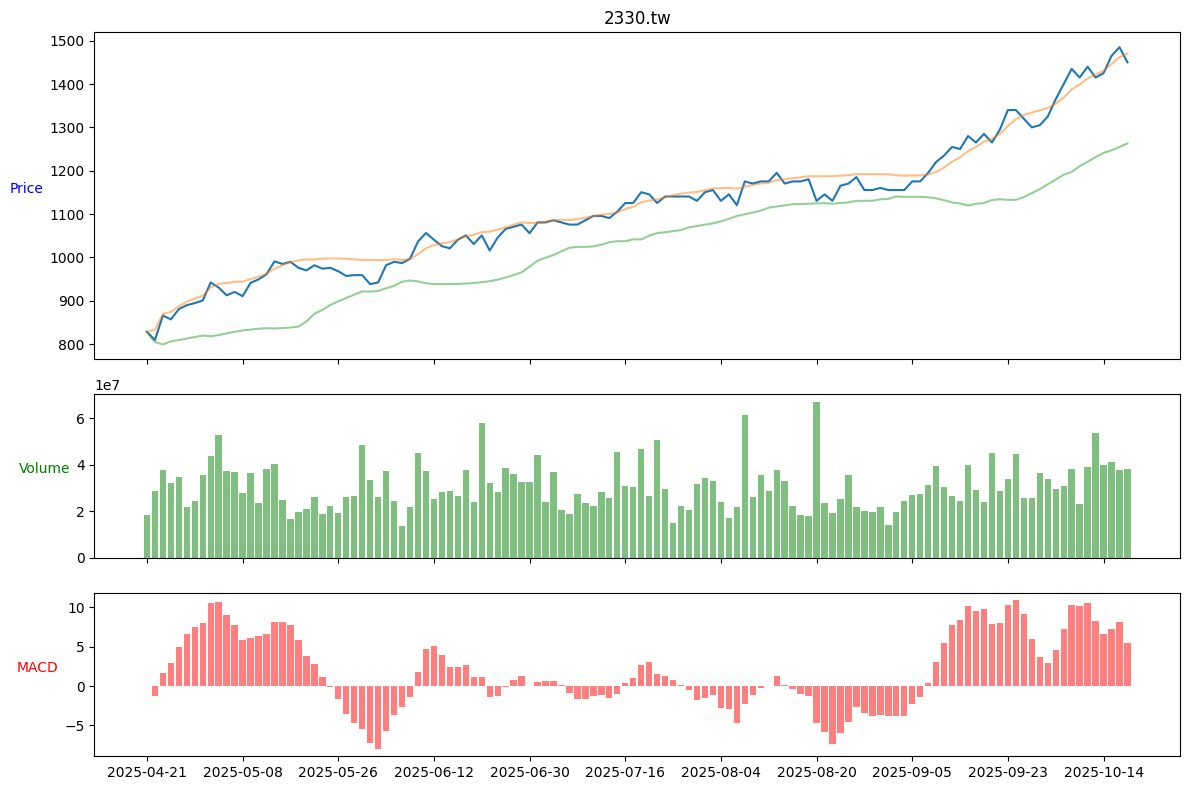

In [17]:
# 創建三個子圖
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                    figsize=(12, 8),
                    gridspec_kw={'height_ratios': [2, 1, 1]},
                    sharex=True)

# 設定 x 軸時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# 繪製收盤價
ax1.plot(new_df['Close'], label='Close')
# 加入布林通道
ax1.plot(new_df['Upper_Band'], alpha=0.5) # alpha 設定透明度
ax1.plot(new_df['Lower_Band'], alpha=0.5)
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num])

# 繪製交易量
ax2.bar(new_df.index, new_df['Volume'], alpha=0.5, color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')

# 繪製技術指標
ax3.bar(new_df.index, new_df['MACD_Histogram'], alpha=0.5, color='red')
ax3.set_ylabel('MACD', color='red', rotation=0, ha='right')

# 調整子圖間的距離
plt.tight_layout()

# 顯示圖表
plt.show()

### 繪製 K 線圖：mplfinance

### 1️⃣6️⃣ 匯入技術分析繪圖套件

In [18]:
!pip install mplfinance
import mplfinance as mpf

### 1️⃣7️⃣ 選擇資料時間

In [19]:
kplot_df=new_df.set_index('Date')
#kplot_df = kplot_df['2024-02-01':'2024-07-29']
kplot_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13,EMA12,EMA26,MACD_line,MACD_signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,,
2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0,1387.50,1361.153846,1370.679024,1311.738816,58.940207,50.610131,8.330076,69.117647,1421.694054,1231.309925,918434351
2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0,1402.50,1371.153846,1379.036097,1320.128534,58.907563,52.269618,6.637946,74.242424,1430.916668,1241.081343,958323607
2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0,1420.00,1380.769231,1392.261313,1330.859753,61.401559,54.096006,7.305553,75.000000,1445.973300,1247.026700,999380012
2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0,1435.00,1391.923077,1406.528803,1342.277549,64.251254,56.127056,8.124198,73.015873,1461.665047,1254.834953,1037117690
2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0,1441.25,1401.923077,1413.216680,1350.256990,62.959689,57.493582,5.466107,65.714286,1470.626354,1262.873646,999040359


### 1️⃣8️⃣ 用 mplfinance 繪製 K 線圖

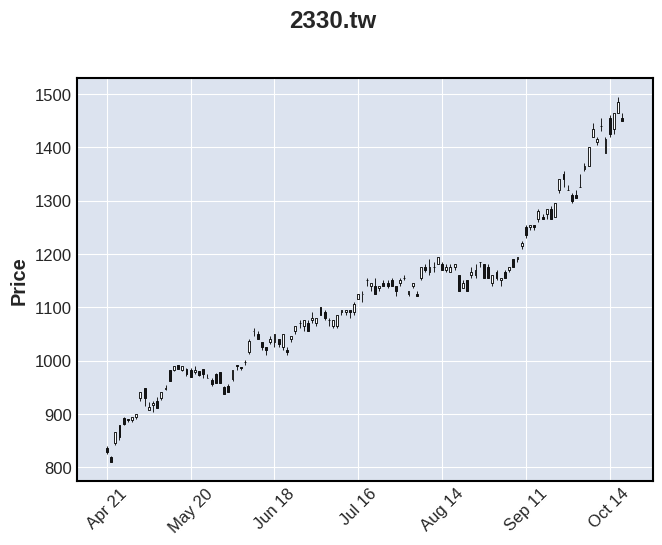

In [20]:
mpf.plot(kplot_df, type='candle', title=f'{stock_id}')

### 1️⃣9️⃣ 加入繪圖設定

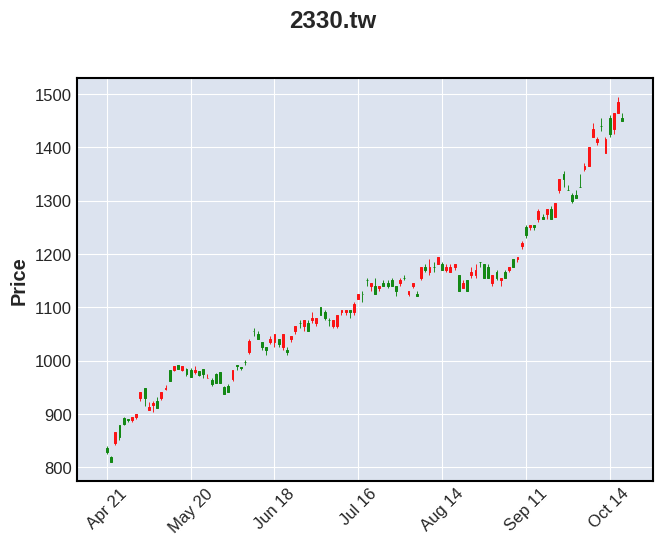

In [21]:
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)
# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle',
    style=my_style, title=f'{stock_id}')

### 2️⃣0️⃣ 加入子圖

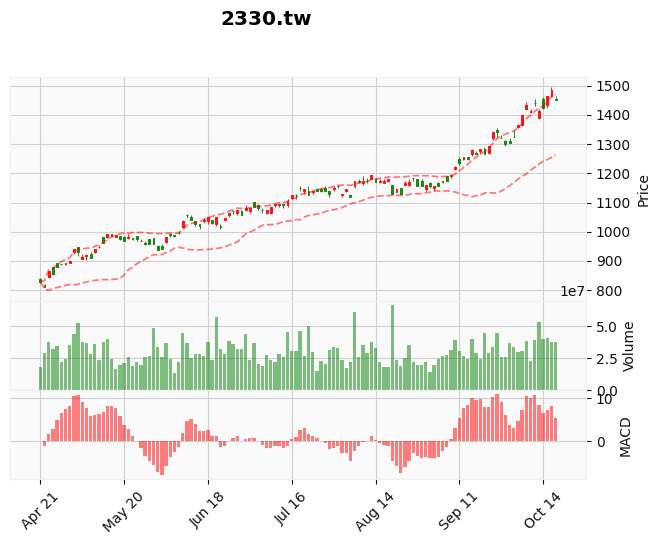

In [22]:
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',
                marketcolors=my_color)

# 交易量和技術指標子圖
ap = [
    # 上軌線
    mpf.make_addplot(kplot_df['Upper_Band'], color='red',
                      alpha=0.5, linestyle='--'),
    # 下軌線
    mpf.make_addplot(kplot_df['Lower_Band'], color='red',
                     alpha=0.5, linestyle='--'),
    # 成交量
    mpf.make_addplot(kplot_df['Volume'], panel=1, type='bar',
                     color='g', alpha=0.5, ylabel='Volume'),
    # MACD
    mpf.make_addplot(kplot_df['MACD_Histogram'], panel=2, type='bar',
                     color='r', alpha=0.5, ylabel='MACD')
]

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', addplot=ap,
          style=my_style, title=f'{stock_id}')

## 4-3 plotly 互動式圖表

### 2️⃣1️⃣ 檢視資料

In [23]:
bk_df = new_df
bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')
bk_df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA8,MA13,EMA12,EMA26,MACD_line,MACD_signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,,,
2025-10-13,2025-10-13 00:00:00+08:00,1390.0,1420.0,1390.0,1415.0,53850992,0.0,0.0,1387.50,1361.153846,1370.679024,1311.738816,58.940207,50.610131,8.330076,69.117647,1421.694054,1231.309925,918434351
2025-10-14,2025-10-14 00:00:00+08:00,1455.0,1460.0,1420.0,1425.0,39889256,0.0,0.0,1402.50,1371.153846,1379.036097,1320.128534,58.907563,52.269618,6.637946,74.242424,1430.916668,1241.081343,958323607
2025-10-15,2025-10-15 00:00:00+08:00,1435.0,1465.0,1425.0,1465.0,41056405,0.0,0.0,1420.00,1380.769231,1392.261313,1330.859753,61.401559,54.096006,7.305553,75.000000,1445.973300,1247.026700,999380012
2025-10-16,2025-10-16 00:00:00+08:00,1465.0,1495.0,1465.0,1485.0,37737678,0.0,0.0,1435.00,1391.923077,1406.528803,1342.277549,64.251254,56.127056,8.124198,73.015873,1461.665047,1254.834953,1037117690
2025-10-17,2025-10-17 00:00:00+08:00,1455.0,1465.0,1450.0,1450.0,38077331,0.0,0.0,1441.25,1401.923077,1413.216680,1350.256990,62.959689,57.493582,5.466107,65.714286,1470.626354,1262.873646,999040359


### 2️⃣2️⃣ 匯入 plotly 套件

In [24]:
import plotly.graph_objects as go

### 2️⃣3️⃣ 繪製互動式 K 線圖

In [25]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# 調整寬高
fig.update_layout(
    height=800,
    width=1200
)

# 顯示圖表
fig.show()

### 2️⃣4️⃣ 移除非交易日空值
解決繪圖不連續問題

In [26]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# 調整寬高
fig.update_layout(
    height=800,
    width=1200
)

# 移除非交易日空值
# 生成該日期範圍內的所有日期
all_dates = pd.date_range(start=bk_df.index.min(),
              end=bk_df.index.max())
# 找出不在資料中的日期
breaks = all_dates[~all_dates.isin(bk_df.index)]
dt_breaks = breaks.tolist() # 轉換成列表
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

# 顯示圖表
fig.show()

/tmp/ipython-input-1835360458.py:21: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2️⃣5️⃣ 加入懸停十字軸

In [27]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])


# 圖表更新-加入懸停十字軸
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_layout(
    height=800,
    width=1200
)


# 移除非交易日空值
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # 生成該日期範圍內的所有日期
breaks = all_dates[~all_dates.isin(bk_df.index)] # 找出不在資料中的日期
dt_breaks = breaks.tolist() # 轉換成列表
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

/tmp/ipython-input-3746432464.py:24: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2️⃣6️⃣ 加入技術指標

In [28]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red', decreasing_line_color='green',
            name = "K 線")])


# 布林通道
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Upper_Band'],mode='lines',
    line={'color': 'green','dash': 'dash'},name = "上軌線"))
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Lower_Band'], mode='lines',
    line={'color': 'green', 'dash': 'dash'},name = "下軌線"))

# 交易量
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['Volume'], marker={'color': 'green'},
      yaxis='y2', name = "交易量"))

# MACD
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['MACD_Histogram'], marker={'color': 'red'},
      yaxis='y3', name = "MACD"))

# 加入懸停十字軸
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="toaxis")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")

# 更新畫布大小並增加範圍選擇
fig.update_layout(
    height=800,
    yaxis={'domain': [0.35, 1]},
    yaxis2={'domain': [0.15, 0.3]},
    yaxis3={'domain': [0, 0.15]},
    title=f"{stock_id}",
    xaxis={
        # 範圍選擇格
        'rangeselector': {
            'buttons': [
                {'count': 1, 'label': '1M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 6, 'label': '6M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 1, 'label': '1Y',
                  'step': 'year', 'stepmode': 'backward'},
                {'step': 'all'}
            ]
        },
        # 範圍滑動條
        'rangeslider': {
            'visible': True,
            # 滑動條的高度 (設置 0.01 就會變單純的 bar)
            'thickness': 0.01,
            'bgcolor': "#E4E4E4"  # 背景色
        },
        'type': 'date'
    }
)


# 移除非交易日空值
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # 生成該日期範圍內的所有日期
breaks = all_dates[~all_dates.isin(bk_df.index)] # 找出不在資料中的日期
dt_breaks = breaks.tolist() # 轉換成列表
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

/tmp/ipython-input-3180122684.py:69: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2️⃣7️⃣ 寫成函式

In [29]:
# 下載資料並讓 AI 計算指標
def download_stock_data(stock_id, start=None,
                        end=None, indicator='MACD'):
    stock_id = f"{stock_id}.tw"
    if not end:
        end = dt.date.today()
    if not start:
        start = end - dt.timedelta(days=365)
    # 從 yf 下載資料
    #df = yf.download(stock_id, start=start, end=end).reset_index()
    df = yf.Ticker(stock_id).history(start=start, end=end)

    # AI 計算技術指標
    code_str = ai_helper(df, f"計算{indicator}")
    print(code_str)

    # 將 exec 生成的 calculate 設為局部變數
    local_vars = {}
    exec(code_str, globals(), local_vars)
    calculate = local_vars['calculate']

    df = calculate(df)

    # 資料處理
    bk_df = df.reset_index()
    bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')

    return bk_df

# 繪製圖表函式
def create_stock_figure(stock_id, bk_df):

    # 創建 K 線圖
    fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
                        open=bk_df['Open'],
                        high=bk_df['High'],
                        low=bk_df['Low'],
                        close=bk_df['Close'],
                        increasing_line_color='red',
                        decreasing_line_color='green',
                        name = "K 線")])

    # 交易量
    fig.add_trace(go.Bar(x=bk_df.index, y=bk_df['Volume'],
                         marker={'color': 'green'}, yaxis='y2',
                           name = "交易量"))

    # 找出需要繪製的欄位
    columns = bk_df.columns
    exclude_columns = ['index','Date', 'Open', 'High',
                        'Low', 'Close', 'Adj Close', 'Volume']
    remain_columns = [col for col in columns if
                       col not in exclude_columns]
    min_close = bk_df['Close'].min() - bk_df['Close'].std()
    max_close = bk_df['Close'].max() + bk_df['Close'].std()
    # 繪製技術指標
    for i in remain_columns:
      if min_close <= bk_df[i].mean() <= max_close:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', name=i))
      else:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', yaxis='y3', name=i))

    # 加入懸停十字軸
    fig.update_xaxes(showspikes=True, spikecolor="gray",
                    spikemode="toaxis")
    fig.update_yaxes(showspikes=True, spikecolor="gray",
                    spikemode="across")
    # 更新畫布大小並增加範圍選擇
    fig.update_layout(
        height=800,
        width=1200,
        yaxis={'domain': [0.35, 1]},
        yaxis2={'domain': [0.15, 0.3]},
        # 若要重疊 y1 和 y3, 可以改成
        # yaxis3=dict(overlaying='y', side='right')
        yaxis3={'domain': [0, 0.15]},
        title=f"{stock_id}",
        xaxis={
            # 範圍選擇格
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 1, 'label': '1Y',
                      'step': 'year', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            # 範圍滑動條
            'rangeslider': {
                'visible': True,
                'thickness': 0.01,  # 滑動條的高度
                'bgcolor': "#E4E4E4"  # 背景色
            },
            'type': 'date'
        }
    )

    # 移除非交易日空值
    # 生成該日期範圍內的所有日期
    all_dates = pd.date_range(start=bk_df.index.min(),
                               end=bk_df.index.max())
    # 找出不在資料中的日期
    breaks = all_dates[~all_dates.isin(bk_df.index)]
    dt_breaks = breaks.tolist() # 轉換成列表格式
    fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

    return fig

# 主函式
def plotly_stock(stock_id, start=None, end=None, indicator='MACD'):

    df = download_stock_data(stock_id, start, end, indicator)
    fig = create_stock_figure(stock_id,df)
    fig.show()

### 2️⃣8️⃣ 執行函式

In [30]:
plotly_stock("2454", start='2022-01-01', end= None, indicator='布林通道及MACD')


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate Bollinger Bands and MACD for the given DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing columns ['Open', 'High', 'Low', 'Close',
        'Volume', 'Dividends', 'Stock Splits'].

    Returns
    -------
    pd.DataFrame
        The original DataFrame augmented with Bollinger Band and MACD
        related columns.
    """
    # Bollinger Bands (20‑period, 2‑sigma)
    period_bb = 20
    df['BB_middle'] = df['Close'].rolling(window=period_bb, min_periods=1).mean()
    df['BB_std'] = df['Close'].rolling(window=period_bb, min_periods=1).std()
    df['BB_upper'] = df['BB_middle'] + 2 * df['BB_std']
    df['BB_lower'] = df['BB_middle'] - 2 * df['BB_std']

    # MACD (12‑period EMA minus 26‑period EMA)
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12']

/tmp/ipython-input-2562460760.py:108: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

